In [24]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from n_dimensional_datasets import *
from plotter import *

In [25]:
start = -1
stop = 1
n_samples = 1000
n_test_samples = n_samples

mean error: 2.451265757765859e-05, mean score: 0.9998961100462868


errors: [-5.2170331057149315e-05, -2.7467976826984632e-05, -5.323720528662847e-06, -1.1981930618490351e-05, 8.618770971188364e-06, 3.604442746721295e-06, -2.0744584386286144e-05, -1.8245527054532722e-07, -4.878343169547568e-05, -6.624893167508195e-05]

score: [0.9998979508968256, 0.9999105128865449, 0.999915441242414, 0.9998896017909671, 0.9999039994419563, 0.9998854089402813, 0.9998948127321959, 0.9998594390588573, 0.9999044981806275, 0.9998994352921979]
test score on best set: 1.00 (+/- 0.00)


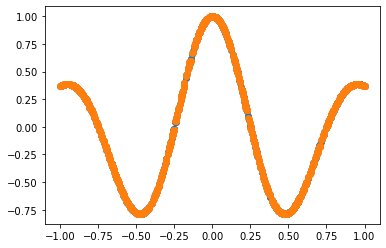

In [26]:
n_features = 1

stats = {"score": [], "error": [], "scorevar": []}
score = []
best = None

seeds = range(10)
for seed in seeds:
    X = stochastic_mesh(n_features, start, stop, n_samples, seed=seed).T
    X_test = stochastic_mesh(n_features, start, stop, n_test_samples, seed=seed).T
    y = decaying_sinewave_nd(X.T)
    y_test = decaying_sinewave_nd(X_test.T)
    forest = RandomForestRegressor()
    forest.fit(X,y)
    xval_score = cross_val_score(forest, X, y, cv=5)
    stats["error"].append(np.mean(forest.predict(X)-y))
    stats["score"].append(xval_score.mean())
    stats["scorevar"].append(xval_score.std())
    if best is None or np.any(score > stats["score"]):
        best = forest
print("mean error: {}, mean score: {}\n\n".format(np.mean(np.abs(stats["error"])), np.mean(np.abs(stats["score"]))))
print("errors: {}\n\nscore: {}".format(stats["error"], stats["score"]))
print("test score on best set: %0.2f (+/- %0.2f)" % (best.score(X_test, y_test).mean(), np.mean(stats["scorevar"]) * 2))

if X.shape[1] == 2:
    plot3d_approximation(X.T, y.T.reshape(-1), best.predict(X).reshape(-1))

import matplotlib.pyplot as plt
if X.shape[1] == 1:
    plt.plot(X, y, 'o')
    plt.plot(X, best.predict(X), 'o')

mean error: 0.0011145984422040625, mean score: 0.8212504880454606


errors: [0.00016704747689218858, 0.0010055501662753186, -0.0010613395788186288, -0.0003591110668648105, -0.0023503005211799825, -0.00038242422143267956, 0.0020582127834191896, -0.002199923218883665, 0.0015283415463949743, -3.3733841879186546e-05]

score: [0.8156941495908112, 0.8296766207281945, 0.8395108864034004, 0.8298680374771994, 0.8504052711494465, 0.7897528678812682, 0.7664894922410077, 0.8158048891875188, 0.8381008488672332, 0.8372018169285254]
test score on best set: 0.88 (+/- 0.07)


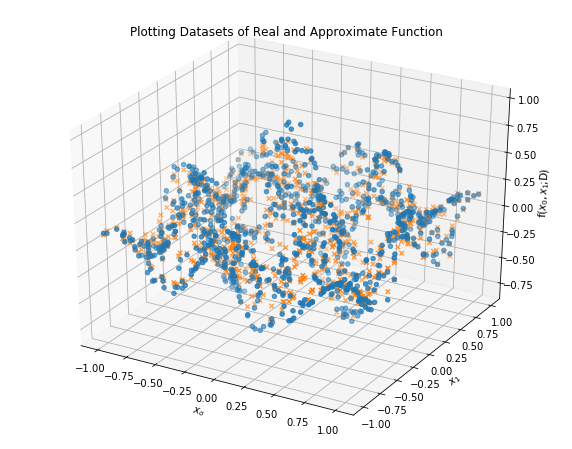

In [27]:
n_features = 2

stats = {"score": [], "error": [], "scorevar": []}
score = []
best = None

seeds = range(10)
for seed in seeds:
    X = stochastic_mesh(n_features, start, stop, n_samples, seed=seed).T
    X_test = stochastic_mesh(n_features, start, stop, n_test_samples, seed=seed).T
    y = decaying_sinewave_nd(X.T)
    y_test = decaying_sinewave_nd(X_test.T)
    forest = RandomForestRegressor()
    forest.fit(X,y)
    xval_score = cross_val_score(forest, X, y, cv=5)
    stats["error"].append(np.mean(forest.predict(X)-y))
    stats["score"].append(xval_score.mean())
    stats["scorevar"].append(xval_score.std())
    if best is None or np.any(score > stats["score"]):
        best = forest
print("mean error: {}, mean score: {}\n\n".format(np.mean(np.abs(stats["error"])), np.mean(np.abs(stats["score"]))))
print("errors: {}\n\nscore: {}".format(stats["error"], stats["score"]))
print("test score on best set: %0.2f (+/- %0.2f)" % (best.score(X_test, y_test).mean(), np.mean(stats["scorevar"]) * 2))

if X.shape[1] == 2:
    plot3d_approximation(X.T, y.T.reshape(-1), best.predict(X).reshape(-1))